<h1>Exploratory Data Analysis</h1>

In this notebook i will explore the basics of the exploratory data analysis, checking the dataset status (number of NaNs, zeros, variable types, number of variables, etc) and making some graphics for the categorical and numeric variables. To do some tasks, i will use the funPyModeling library, because it has some helpful methods.

I will also use Pandas, Pandas Profiling, Seaborn and MatPlotLib libraries.

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
from ipynb.fs.full.funPyModeling import status, freq_tbl

<h3>Data Loading</h3>

In [6]:
data=pd.read_csv("data/data_corona_group.csv", sep = ";")

<h3>Dataset Status</h3>

In [7]:
data

,Sno,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020 12:00:00,Anhui,China,01/22/2020 12:00:00,1,0,0
1,2,01/22/2020 12:00:00,Beijing,China,01/22/2020 12:00:00,14,0,0
2,3,01/22/2020 12:00:00,Chongqing,China,01/22/2020 12:00:00,6,0,0
3,4,01/22/2020 12:00:00,Fujian,China,01/22/2020 12:00:00,1,0,0
4,5,01/22/2020 12:00:00,Gansu,China,01/22/2020 12:00:00,0,0,0
...,...,...,...,...,...,...,...,...
116,1715,02/17/2020 22:00:00,"Madison, WI",US,2020-02-05T21:53:02,1,0,0
117,1716,02/17/2020 22:00:00,"Orange, CA",US,2020-02-01T19:53:03,1,0,0
118,1717,02/17/2020 22:00:00,"San Antonio, TX",US,2020-02-13T18:53:02,1,0,0
119,1718,02/17/2020 22:00:00,"Seattle, WA",US,2020-02-09T07:03:04,1,0,1


In [8]:
status(data)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,Sno,0,0.000000,0,0.000000,121,int64
1,Date,0,0.000000,0,0.000000,9,object
2,Province/State,26,0.214876,0,0.000000,61,object
3,Country,0,0.000000,0,0.000000,34,object
4,Last Update,0,0.000000,0,0.000000,64,object
5,Confirmed,0,0.000000,12,0.099174,53,int64
6,Deaths,0,0.000000,95,0.785124,10,int64
7,Recovered,0,0.000000,62,0.512397,39,int64


Using the status method from funPyModeling, i see the number of NaNs, zeros and the data types (the object type means categorical). In this case, there 26 NaNs in the 'Province/State' variables, 4 categorical variables ('Date', 'Province/State', 'Country' and 'Last Update') and 4 numerical variables ('Sno', 'Confirmed', 'Deaths', 'Recovered').

Also, there are tree high cardinality variables, 'Province/State', 'Country' and 'Last Update'

<h3>Numerical variables analysis</h3>

array([[<AxesSubplot:title={'center':'Sno'}>,
        <AxesSubplot:title={'center':'Confirmed'}>],
       [<AxesSubplot:title={'center':'Deaths'}>,
        <AxesSubplot:title={'center':'Recovered'}>]], dtype=object)

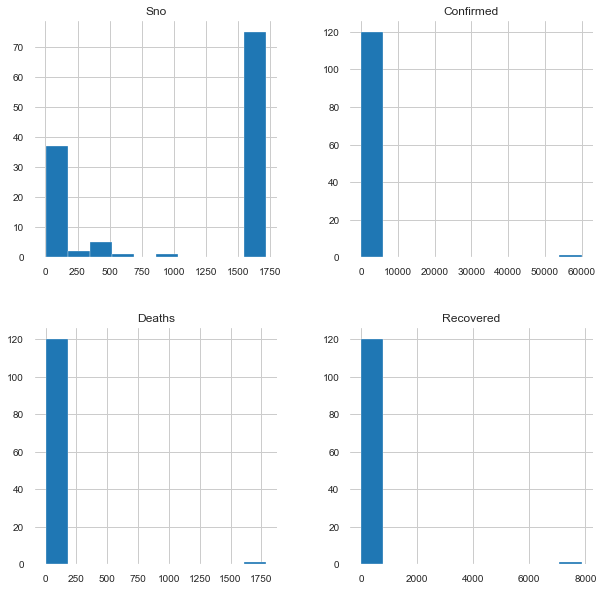

In [9]:
data.hist(figsize = (10,10))

From this histograms, i see outliers in 'Confirmed', 'Deaths' and 'Recovered'.

In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Sno,121.0,1086.743802,774.530293,1.0,31.0,1659.0,1689.0,1719.0
Confirmed,121.0,610.677686,5449.482485,0.0,1.0,4.0,72.0,59989.0
Deaths,121.0,15.438017,162.589150,0.0,0.0,0.0,0.0,1789.0
Recovered,121.0,103.991736,718.648077,0.0,0.0,0.0,12.0,7862.0


Here i can see the outliers with the percentiles

<h3>Categorical variables analysis</h3>

Watching the Country values

In [11]:
data['Country'].value_counts().index

Index(['China', 'Mainland China', 'US', 'Australia', 'Canada', 'Others',
       'Germany', 'India', 'Russia', 'Vietnam', 'Italy', 'Singapore',
       'Ivory Coast', 'Nepal', 'Sri Lanka', 'UK', 'Egypt', 'Taiwan', 'Japan',
       'Finland', 'United Arab Emirates', 'Brazil', 'Hong Kong', 'South Korea',
       'Belgium', 'Macau', 'Spain', 'Cambodia', 'Philippines', 'Thailand',
       'Sweden', 'Malaysia', 'France', 'Mexico'],
      dtype='object')

I will a graphic ordering by Country value

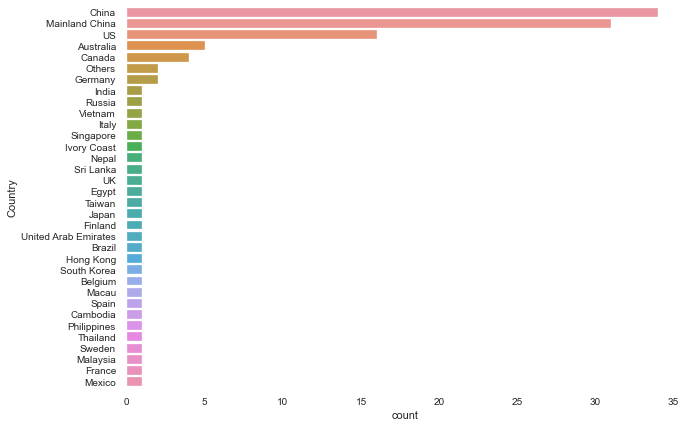

In [12]:
plt.figure(figsize=(10,7))
sns.countplot(y=data['Country'], order = data['Country'].value_counts().index)
plt.show()

Categorical variables quantitative analysis

In [13]:
freq_tbl(data)

                  Date  frequency  percentage  cumulative_perc
0  02/17/2020 22:00:00         75    0.619835         0.619835
1  01/22/2020 12:00:00         34    0.280992         0.900826
2  01/31/2020 19:00:00          5    0.041322         0.942149
3  01/23/2020 12:00:00          2    0.016529         0.958678
4  02/08/2020 23:04:00          1    0.008264         0.966942
5  01/24/2020 12:00:00          1    0.008264         0.975207
6  01/26/2020 23:00:00          1    0.008264         0.983471
7  01/27/2020 20:30:00          1    0.008264         0.991736
8  02/02/2020 21:00:00          1    0.008264         1.000000

----------------------------------------------------------------

     Province/State  frequency  percentage  cumulative_perc
0           Tianjin          2    0.016529         0.021053
1           Sichuan          2    0.016529         0.042105
2            Yunnan          2    0.016529         0.063158
3             Henan          2    0.016529         0.084211
4  

Index(['Date', 'Province/State', 'Country', 'Last Update'], dtype='object')

<h3>Pandas Profiling</h3>

Using this, i will have an overview of all the data

In [14]:
ProfileReport(data)